In [2]:
import torch


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
model = "/Users/software/Desktop/ai-in-textile/images/perfect_sample.png"

Number of Contours found = 15


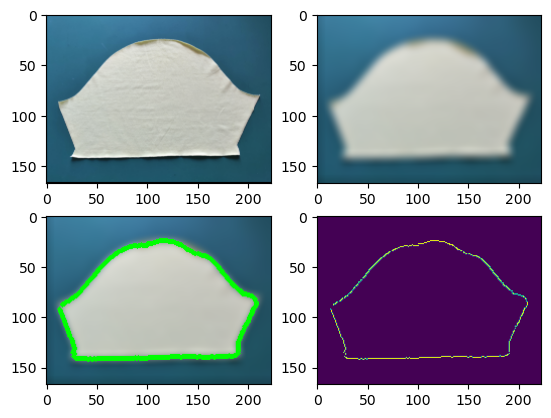

In [3]:
cloth_image = cv2.imread(model)
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(cloth_image)

cloth_image = cv2.GaussianBlur(cloth_image,(15,15),cv2.BORDER_DEFAULT) 

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(cloth_image)



gray_scale = cv2.cvtColor(cloth_image,cv2.COLOR_BGR2GRAY)
edge_detected = cv2.Canny(gray_scale , 10 ,100)



contours, hierarchy = cv2.findContours(edge_detected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))
# Draw all contours
# -1 signifies drawing all contours
cloth_contours=cv2.drawContours(cloth_image, contours, -1, (0, 255, 0), 3)


ax3 = fig.add_subplot(2,2,3)
ax3.imshow(cloth_contours)
ax2 = fig.add_subplot(2,2,4)
ax2.imshow(edge_detected)

#instead of rgb it's reading it as bgr

In [4]:
defect_piece = "/Users/software/Desktop/ai-in-textile/images/dark_background/WhatsApp Image 2023-06-07 at 8.51.14 AM.jpeg"

Number of Contours found = 15


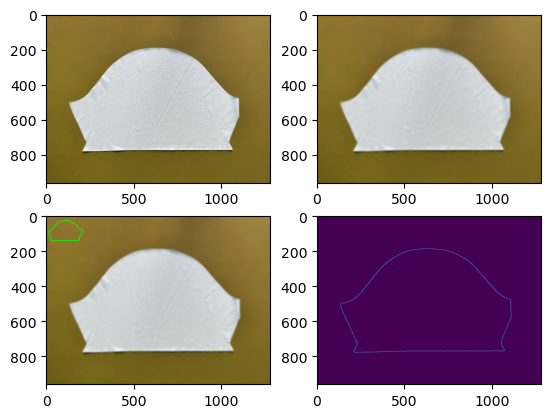

In [5]:
cloth_image = cv2.imread(defect_piece)
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(cloth_image)

cloth_image = cv2.GaussianBlur(cloth_image,(15,15),cv2.BORDER_DEFAULT) 

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(cloth_image)



gray_scale = cv2.cvtColor(cloth_image,cv2.COLOR_BGR2GRAY)
edge_detected = cv2.Canny(gray_scale , 10 ,100)



defect_contours, hierarchy = cv2.findContours(edge_detected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))
# Draw all contours
# -1 signifies drawing all contours
cloth_contours=cv2.drawContours(cloth_image, contours, -1, (0, 255, 0), 3)


ax3 = fig.add_subplot(2,2,3)
ax3.imshow(cloth_contours)
ax2 = fig.add_subplot(2,2,4)
ax2.imshow(edge_detected)

#instead of rgb it's reading it as bgr

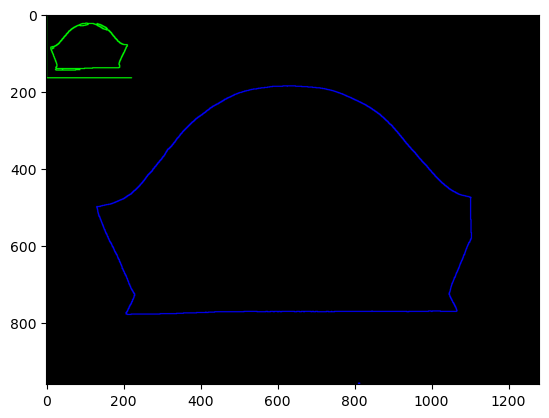

In [6]:
import cv2
import numpy as np

# Read the first image
image1 = cv2.imread(model)

# Read the second image
image2 = cv2.imread(defect_piece)

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred1 = cv2.GaussianBlur(gray1, (5, 5), 0)
blurred2 = cv2.GaussianBlur(gray2, (5, 5), 0)

# Perform edge detection using Canny
edges1 = cv2.Canny(blurred1, 50, 150)
edges2 = cv2.Canny(blurred2, 50, 150)

# Find contours in the first edge image
contours1, _ = cv2.findContours(edges1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contours in the second edge image
contours2, _ = cv2.findContours(edges2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank canvas with the size of the larger image
canvas_height = max(image1.shape[0], image2.shape[0])
canvas_width = max(image1.shape[1], image2.shape[1])
canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

# Draw the contours from the first image onto the canvas using green color
cv2.drawContours(canvas, contours1, -1, (0, 255, 0), 2)

# Draw the contours from the second image onto the canvas using red color
cv2.drawContours(canvas, contours2, -1, (0, 0, 255), 2)

# Display the canvas with superimposed contours
plt.imshow(canvas)


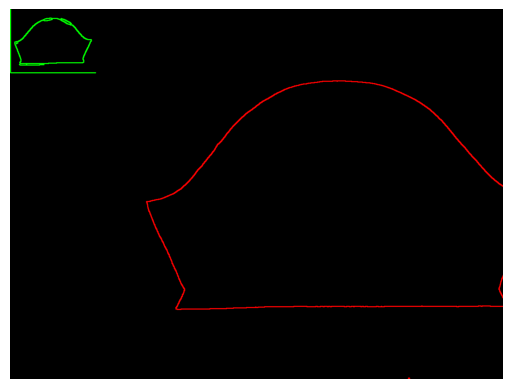

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the first image
image1 = cv2.imread(model)

# Read the second image
image2 = cv2.imread(defect_piece)

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred1 = cv2.GaussianBlur(gray1, (5, 5), 0)
blurred2 = cv2.GaussianBlur(gray2, (5, 5), 0)

# Perform edge detection using Canny
edges1 = cv2.Canny(blurred1, 50, 150)
edges2 = cv2.Canny(blurred2, 50, 150)

# Find contours in the first edge image
contours1, _ = cv2.findContours(edges1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contours in the second edge image
contours2, _ = cv2.findContours(edges2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank canvas with the size of the larger image
canvas_height = max(image1.shape[0], image2.shape[0])
canvas_width = max(image1.shape[1], image2.shape[1])
canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

# Adjust the contour coordinates based on image positions and draw them onto the canvas
for contour in contours1:
    shifted_contour = contour + (0, 0)  # Adjust coordinates for the first image
    cv2.drawContours(canvas, [shifted_contour], -1, (0, 255, 0), 2)

for contour in contours2:
    shifted_contour = contour + (image1.shape[1], 0)  # Adjust coordinates for the second image
    cv2.drawContours(canvas, [shifted_contour], -1, (0, 0, 255), 2)

# Convert the BGR image to RGB for displaying with plt.imshow()
canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

# Display the canvas with superimposed contours using plt.imshow()
plt.imshow(canvas_rgb)
plt.axis('off')
plt.show()


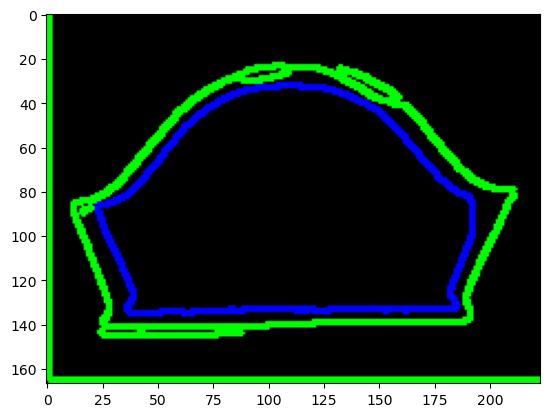

In [8]:
import cv2
import numpy as np


def compare_contours(model,defect_piece):
    # Read the first image
    image1 = cv2.imread(model)

    # Read the second image
    image2 = cv2.imread(defect_piece)

    # Resize the images to the same size
    resized_image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
    resized_image1 = image1

    # Convert images to grayscale
    gray1 = cv2.cvtColor(resized_image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred1 = cv2.GaussianBlur(gray1, (5, 5), 0)
    blurred2 = cv2.GaussianBlur(gray2, (5, 5), 0)

    # Perform edge detection using Canny
    edges1 = cv2.Canny(blurred1, 50, 150)
    edges2 = cv2.Canny(blurred2, 50, 150)

    # Find contours in the first edge image
    contours1, _ = cv2.findContours(edges1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find contours in the second edge image
    contours2, _ = cv2.findContours(edges2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank canvas with the size of the larger image
    canvas_height = max(resized_image1.shape[0], resized_image2.shape[0])
    canvas_width = max(resized_image1.shape[1], resized_image2.shape[1])
    canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

    # Draw the contours from the first image onto the canvas using green color
    cv2.drawContours(canvas, contours1, -1, (0, 255, 0), 2)

    # Draw the contours from the second image onto the canvas using red color
    cv2.drawContours(canvas, contours2, -1, (0, 0, 255), 2)

    # Display the canvas with superimposed contours
    plt.imshow(canvas)
    plt.show()

compare_contours(model,defect_piece)



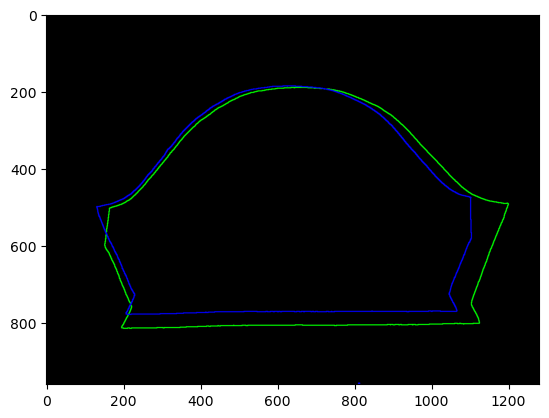

In [9]:
import cv2
import numpy as np

# Read the first image
image1 = "/Users/software/Desktop/ai-in-textile/images/dark_background/WhatsApp Image 2023-06-07 at 8.51.13 AM.jpeg"

# Read the second image
image2 = "/Users/software/Desktop/ai-in-textile/images/dark_background/WhatsApp Image 2023-06-07 at 8.51.14 AM.jpeg"

compare_contours(image1,image2)


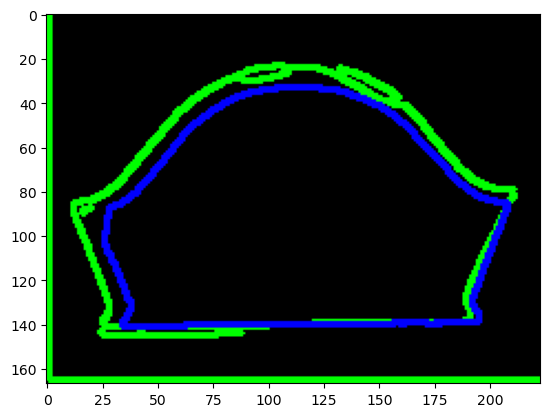

In [10]:
compare_contours(model,image1)

In [11]:
import cv2
from skimage.metrics import structural_similarity as ssim
def compare_similarity_images(model,defect_piece):  
    # Read the images
    image1 = cv2.imread(model)
    image2 = cv2.imread(defect_piece)

    # Convert the images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate the SSIM value
    ssim_value = ssim(gray1, gray2)

    # Calculate the Mean Squared Error (MSE)
    mse_value = ((gray1 - gray2) ** 2).mean()

    # Display the similarity metrics
    print(f"SSIM value: {ssim_value}")
    print(f"MSE value: {mse_value}")


ModuleNotFoundError: No module named 'skimage'

In [ ]:
compare_contours(model,image1)
